In [118]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from os import listdir
from os.path import isfile, join
from imblearn.over_sampling import SMOTE

In [2]:
Science_fiction = 0
Horror = 1
Adventure = 2
Humor = 3
Western = 4
Mystery = 5
Gothic = 6


In [3]:
nltk_stop_words = nltk.corpus.stopwords.words('english')

In [237]:
f = open("set0/western01.txt", "r")
western1 = f.read()

In [45]:
f = open("set0/gothic00.txt", "r")
gothic1 = f.read()

In [33]:
def remove_gutenberg_preamble(text):
    try:
        return text[text.index("***", text.index("START OF THIS PROJECT GUTENBERG"))+3:]
    except:
        return text[text.index("***", text.index("START OF THE PROJECT GUTENBERG"))+3:]

In [34]:
def remove_gutenberg_postscript(text):
    try:
        return text[:text.index("***", text.index("END OF THE PROJECT GUTENBERG"))-3]
    except:
        return text[:text.index("***", text.index("END OF THIS PROJECT GUTENBERG"))-3]

In [238]:
western1 = remove_gutenberge_preamble(western1)

In [239]:
tokens = word_tokenize(western1)

In [240]:
tokens = [t for t in tokens if t not in string.punctuation]

In [241]:
tokens = [t for t in tokens if t not in nltk_stop_words]

In [33]:
len(tokens)

83640

In [242]:
wordnet_lemmatizer = WordNetLemmatizer()
# vectorizing function to able to call on list of tokens
lemmatize_words = np.vectorize(wordnet_lemmatizer.lemmatize)
lemmatized_text = ' '.join(lemmatize_words(tokens))

In [119]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

In [54]:
text = [western1, remove_gutenberge_preamble(gothic1)]
target = [Western, Gothic]

In [55]:
text_clf.fit(text, target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [69]:
text_clf.predict_proba(["By de name Jim Crow Dat de white folk call If ever I see I 'tends maul Just"])

array([[0.49969613, 0.50030387]])

training by feeding in the entire book seems to be counter productive since the model cannot be decisive

In [82]:
# lets try splitting by \n
f = open("set0/gothic00.txt", "r")
gothic1 = f.read()
gothic1 = remove_gutenberge_preamble(gothic1)

In [83]:
arr = gothic1.split('\n\n')


In [84]:
arr = [a for a in arr if len(a) > 2]


In [85]:
df = pd.DataFrame()
df['text'] = arr

In [86]:
df['label'] = Gothic

In [100]:
df[len(df)-51:]

,text,label
1525,\n*** END OF THE PROJECT GUTENBERG EBOOK THE P...,6
1526,***** This file should be named 174-0.txt or 1...,6
1527,Updated editions will replace the previous one...,6
1528,Creating the works from print editions not pro...,6
1529,START: FULL LICENSE,6
1530,THE FULL PROJECT GUTENBERG LICENSE\nPLEASE REA...,6
1531,To protect the Project Gutenberg-tm mission of...,6
1532,Section 1. General Terms of Use and Redistribu...,6
1533,1.A. By reading or using any part of this Proj...,6
1534,"1.B. ""Project Gutenberg"" is a registered trade...",6


In [55]:
def get_label(file_loc: str) -> int:
    science_fiction = 0
    horror = 1
    adventure = 2
    humor = 3
    western = 4
    mystery = 5
    gothic = 6
    if 'gf_' in file_loc:
        return gothic
    if 'wf_' in file_loc:
        return western
    if 'mf_' in file_loc:
        return mystery
    if 'hm_' in file_loc:
        return humor
    if 'adv_' in file_loc:
        return adventure
    if 'hr_' in file_loc:
        return horror
    if 'sf_' in file_loc:
        return science_fiction

In [56]:
def create_by_newline(file_loc: str, df):
    new_df = pd.DataFrame()
    try:
        f = open(file_loc, "r")
        text = f.read()
        text = remove_gutenberg_preamble(text)
        text = remove_gutenberg_postscript(text)
        arr = text.split('\n\n')
        arr = [a for a in arr if len(a) > 2]
        label = get_label(file_loc)
        new_df['text'] = arr
        new_df['label'] = label
        df = df.append(new_df[5:-3])
        return df
    except:
        return df

In [122]:
text_clf.fit(new_df.text, new_df.label)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [130]:
text_clf.predict([' brother he certainly was, in the eye of the law, and it is more than probable that he was his brother in reality. But thelaird thought otherwise; and, though he knew and acknowledged that hewas obliged to support and provide for him, he refused to acknowledge'])

array([4])

In [131]:
train_on = [
    'set0/western00.txt',
    'set0/western01.txt',
    'set0/western02.txt',
    'set0/western03.txt',
    'set0/gothic00.txt',
    'set0/gothic01.txt',
    'set0/gothic02.txt',
    'set0/gothic03.txt',
    'set0/humor00.txt',
    'set0/humor01.txt',
    'set0/humor02.txt',
    'set0/humor03.txt',
    'set0/horror00.txt',
    'set0/horror01.txt',
    'set0/horror02.txt',
    'set0/horror03.txt',
]

In [206]:
train_on = [join('./set0',f) for f in listdir('./set0') if (isfile(join('./set0', f)) and 'txt' in f)]

In [58]:
train_on = []
for genre in listdir('./books/'):
    for f in listdir('./books/'+genre):
        if('txt' in f):
            train_on.append(join('./books/' + genre, f))

In [59]:
len(train_on)

923

In [60]:
new_df = pd.DataFrame()
for file in train_on:
    new_df = create_by_newline(file, new_df)

In [73]:
new_df

,text,label
5,It was a day typical of early April in New Yor...,4
6,"âGlenn has been gone over a year,â she mus...",4
7,"She lived again, for the thousandth time, the ...",4
8,"âCarley, look and listen!â he had whispered.",4
9,Under them stretched the great long white flar...,4
...,...,...
404,"""Uh-uh,"" Barbara had said, calmly. ""I just _kn...",0
405,"""Uh-huh, I know."" Bernice had nodded her spect...",0
406,"Although both pregnancies were well advanced, ...",0
407,Of what use is it to pit such puny and trivial...,0


In [74]:
new_df = new_df[new_df['label'].between(0,6)]

In [81]:
new_df = new_df.astype({'label':'int32'})

In [82]:
new_df['label'].dtypes

dtype('int32')

In [116]:
new_df.shape

(822126, 2)

In [131]:
values = []
for i in range(7):
    values.append(new_df[new_df['label'] == i].shape[0])
    print(new_df[new_df['label'] == i].shape)

(349298, 2)
(42747, 2)
(95040, 2)
(145129, 2)
(140838, 2)
(23569, 2)
(25505, 2)


In [132]:
print(values)

[349298, 42747, 95040, 145129, 140838, 23569, 25505]


([<matplotlib.axis.XTick at 0x1543959a0>,
 [Text(0, 0, 'sci_fi'),
  Text(1, 0, 'horror'),
  Text(2, 0, 'adventure'),
  Text(3, 0, 'humor'),
  Text(4, 0, 'western'),
  Text(5, 0, 'mystery'),
  Text(6, 0, 'gothic')])

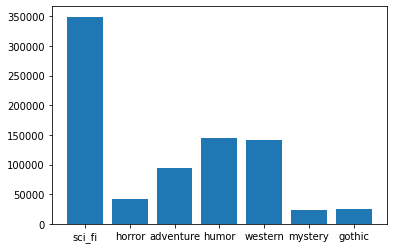

In [135]:
genres = ['sci_fi','horror','adventure','humor','western','mystery','gothic']
plt.bar(range(0,7), values)
plt.xticks(range(0,7), genres)

In [83]:
text_clf.fit(new_df['text'], new_df['label'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [140]:
text_clf.predict_proba(['Immediately subsequent to this disaster, my father seemed nearly in'])

array([[0.16330431, 0.42661755, 0.22499629, 0.18508185]])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(new_df['text'], new_df['label'], 
                                                    random_state=42, stratify=new_df['label'])

In [121]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

In [125]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [226]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [98]:
def check_accuracy(classifier, X_test, y_test):
    y_test_arr = np.array(y_test)
    correct = 0
    for i, item in enumerate(X_test):
        if(i % 10000 == 0):
            print(str(i) + '/' + str(len(y_test)))
        res = classifier.predict([item])
        if(res == y_test_arr[i]):
            correct += 1
    print('Accuracy: ' + str(correct/X_test.shape[0] * 100))

In [127]:
check_accuracy(text_clf, X_test, y_test)

0/205532
10000/205532
20000/205532
30000/205532
40000/205532
50000/205532
60000/205532
70000/205532
80000/205532
90000/205532
100000/205532
110000/205532
120000/205532
130000/205532
140000/205532
150000/205532
160000/205532
170000/205532
180000/205532
190000/205532
200000/205532
Accuracy: 78.27929470836658


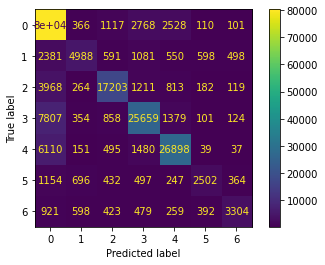

In [122]:
plot_confusion_matrix(text_clf, X_test, y_test)

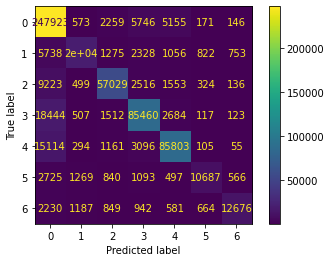

In [123]:
plot_confusion_matrix(text_clf, X_train, y_train)

In [143]:
text_clf.predict(["""No live organism can continue for long to exist sanely under conditions of absolute reality; 
even larks and katydids are supposed, by some, to dream. Hill House, not sane, stood by itself against its hills, 
holding darkness within; it had stood so for eighty years and might stand for eighty more. 
Within, walls continued upright, bricks met neatly, floors were firm, and doors were sensibly shut; 
silence lay steadily against the wood and stone of Hill House, and whatever walked there, walked alone """])
# 1 == Horror

array([1], dtype=int32)

In [233]:
gs_clf.predict(['Howdy there partner'])

array([4])

In [236]:
y_test_arr = np.array(y_test)
y_test_arr = y_test_arr[:len(y_test_arr)//2]
X_test_arr = X_test[:len(y_test_arr)]
correct = 0
for i, item in enumerate(X_test_arr):
    res = gs_clf.predict([item])
    if(res == arr[i]):
        correct += 1
print('Accuracy: ' + str(correct/X_test.shape[0] * 100))

Accuracy: 37.90796909237689
